In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [7]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,863 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [8]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

In [9]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np
from google.colab.patches import cv2_imshow

In [10]:
# TessBaseAPI baseApi = new TessBaseAPI()
# baseApi.init(datapath, language, ocrEngineMode)
# baseApi.setPageSegMode(TessBaseAPI.PageSegMode.PSM_SINGLE_LINE)
# baseApi.setVariable(TessBaseAPI.VAR_CHAR_BLACKLIST, "!?@#$%&*()<>_-+=/:;'\"ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz")
# baseApi.setVariable(TessBaseAPI.VAR_CHAR_WHITELIST, ".,0123456789")
# baseApi.setVariable("classify_bln_numeric_mode", "1")

In [81]:
def length_from_image(img_url):
  imageOrgCp = cv2.imread(img_url)                      # 원본 이미지 불러오기
  height, width, channel = imageOrgCp.shape             # 원본 이미지 크기 저장
  center = (width//2, height//2)                        # 이미지 center값 저장
  grayCp = cv2.cvtColor(imageOrgCp, cv2.COLOR_BGR2GRAY) # 이미지 흑백으로 전환

  grayCp = cv2.bitwise_not(grayCp)          # 이미지 색반전
  threshold = 250                           # 숫자영역만 원래 0에 가까울것으로 추정되기때문에 색반전후 250 이상인값만 숫자일것으로 추정
  ret, mask = cv2.threshold(grayCp, threshold, 255, cv2.THRESH_BINARY_INV)  # threshold를 사용해 숫자영역을 제외한 나머지 부분 0으로 변환
  mask = cv2.bitwise_not(mask)              # mask영역 색 반전

  img_blurred = cv2.GaussianBlur(mask, ksize=(3, 3), sigmaX=0)  # 숫자영역중 흰색과 경계인 부분은 실제 0에 가까운값이 아니었기때문에 굉장히 얇은 실선 형태로 변환되었기때문에 가우시안 블러를 사용해 모양을 다시 살림

  img_blurred = 255-img_blurred             #
  ret, mask = cv2.threshold(img_blurred, threshold, 255, cv2.THRESH_BINARY_INV)

  mask = 255-mask
  # k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  # mask = cv2.erode(mask, k)
  cv2_imshow(mask)

  chars = pytesseract.image_to_string(mask)
  print(chars.split('\n'))
  return chars


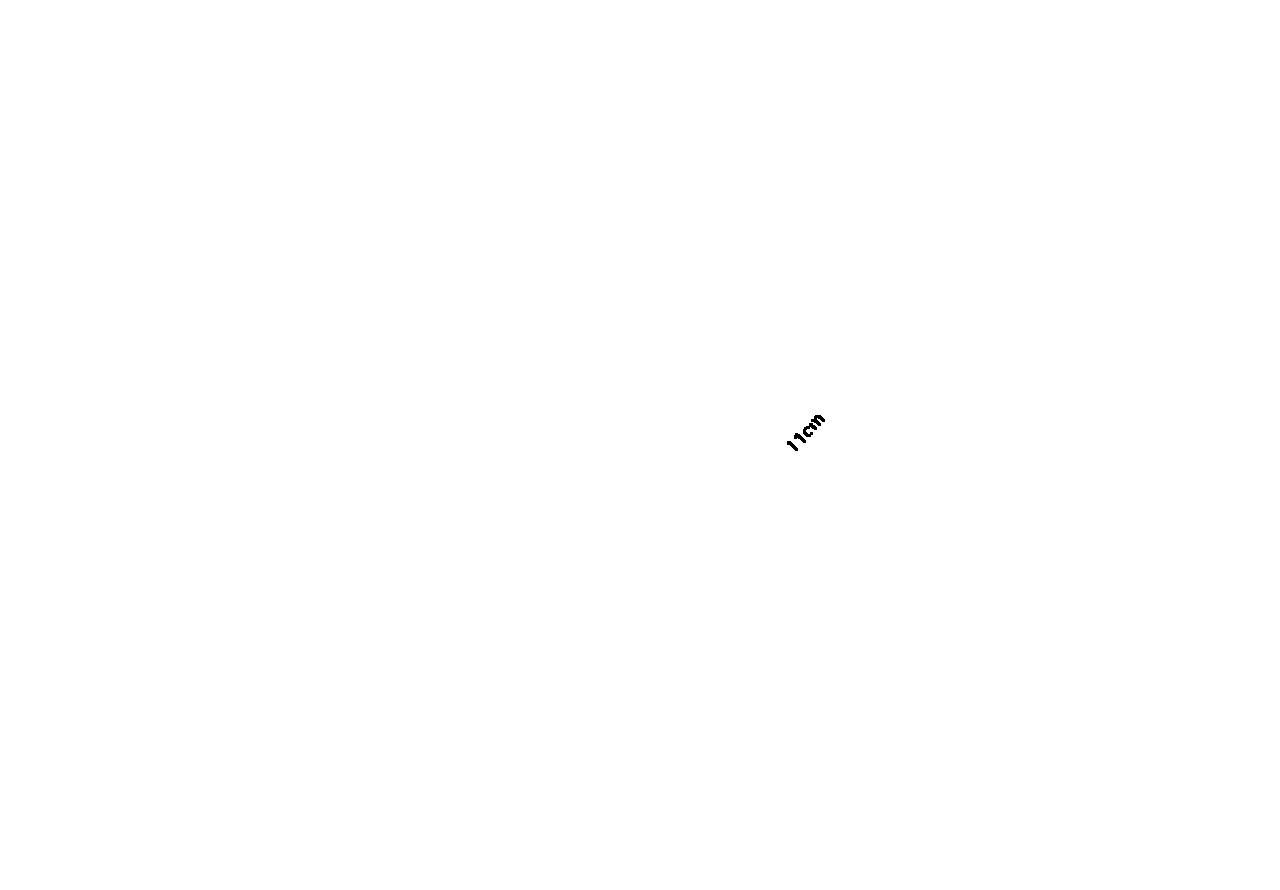

[' ', '\x0c']
 



In [82]:
# char = length_from_image("")
char = length_from_image("/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project/length/test/chilipepper_11cm_3.jpg")
print(char)

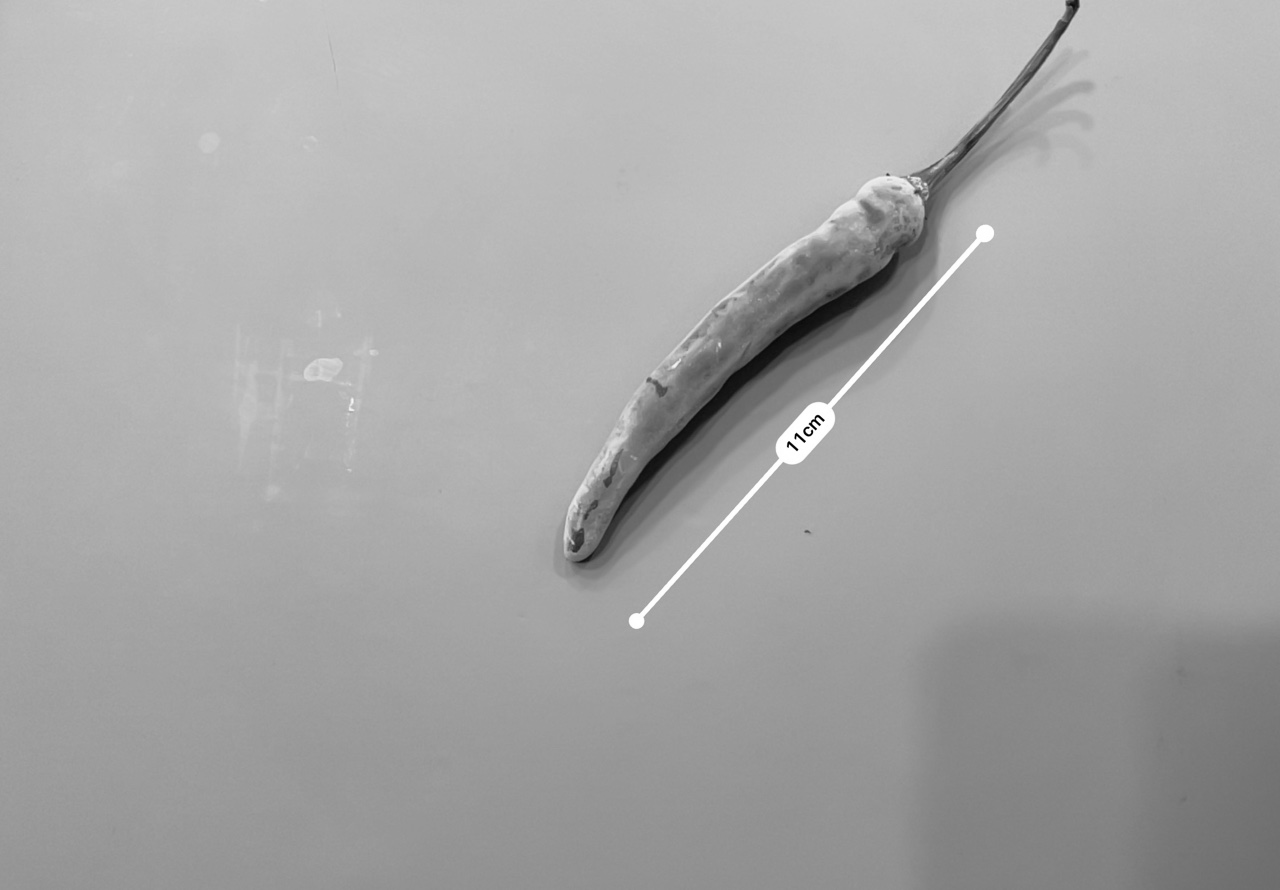

In [83]:
# imread
imageOrgCp = cv2.imread("/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project/length/test/chilipepper_11cm_3.jpg")
height, width, channel = imageOrgCp.shape
center = (width//2, height//2)

grayCp = cv2.cvtColor(imageOrgCp, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayCp)

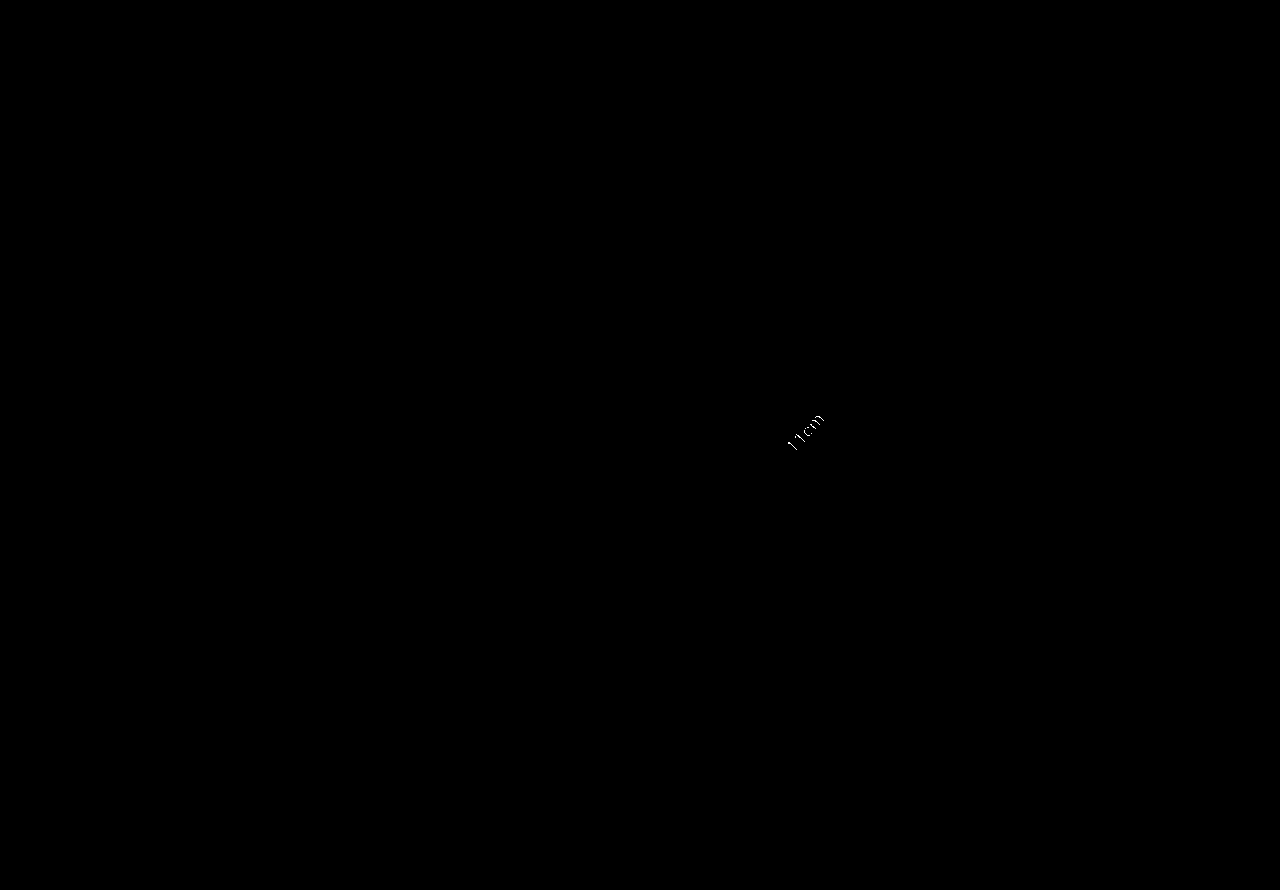

['x', '\x0c']


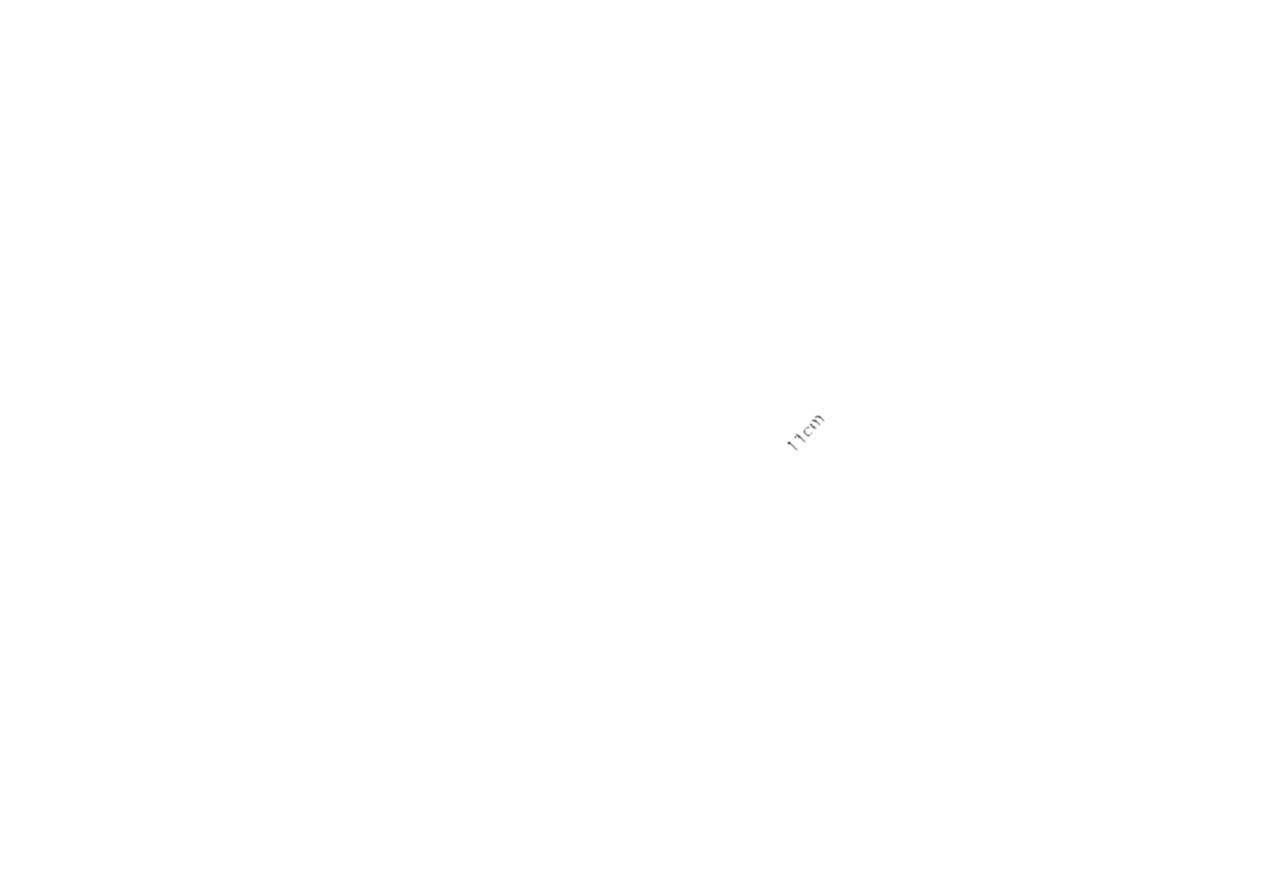

['&', 'ws', '\x0c']


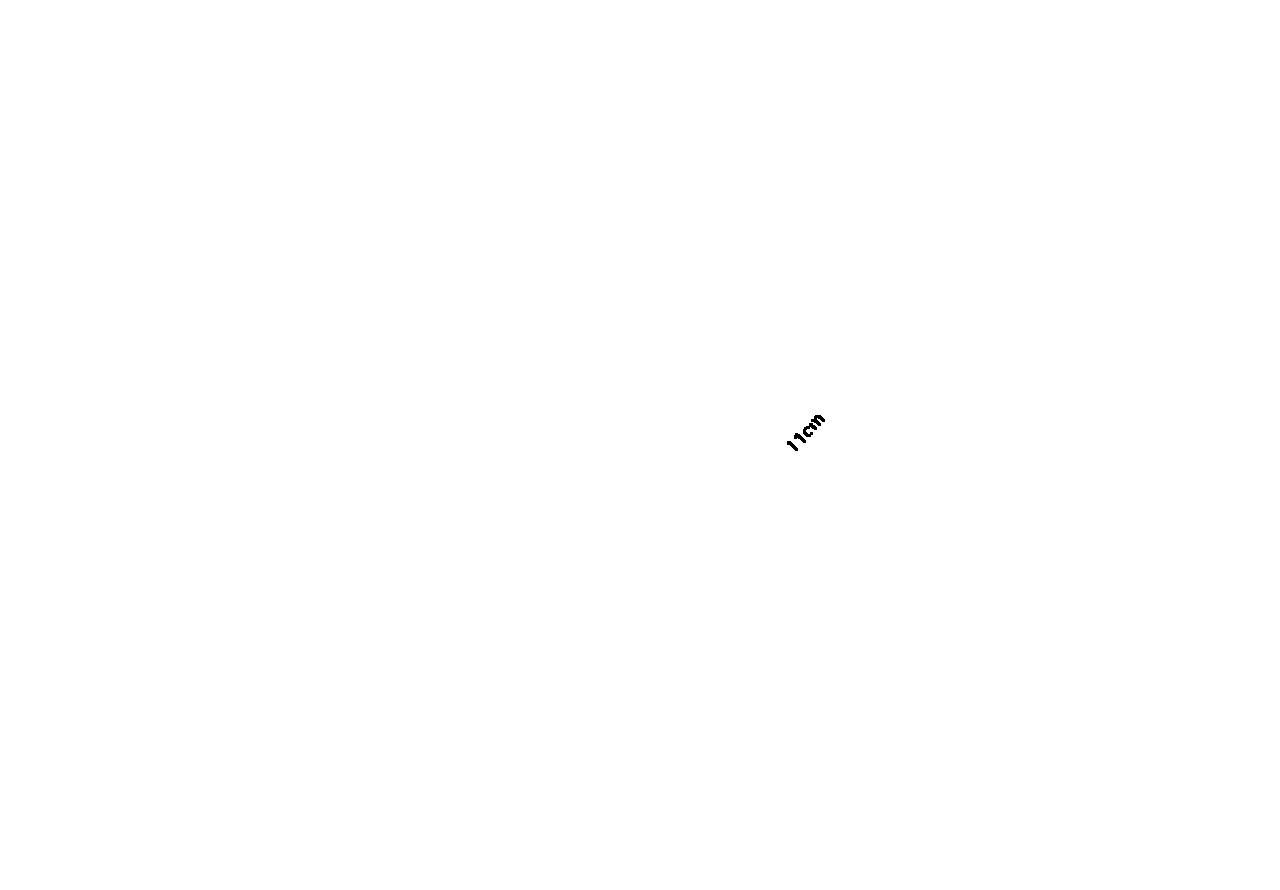

['=', 'ws', '\x0c']


In [90]:
image = grayCp
image = 255-image
threshold = 250
ret, mask = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
mask = cv2.bitwise_not(mask)

cv2_imshow(mask)
chars = pytesseract.image_to_string(mask, config='--psm 6')
print(chars.split('\n'))

mask = 255-mask
img_blurred = cv2.GaussianBlur(mask, ksize=(3, 3), sigmaX=0)

cv2_imshow(img_blurred)
chars = pytesseract.image_to_string(img_blurred, config='--psm 6')
print(chars.split('\n'))


ret, mask = cv2.threshold(img_blurred, threshold, 255, cv2.THRESH_BINARY_INV)

mask = 255-mask
cv2_imshow(mask)
chars = pytesseract.image_to_string(mask, config='--psm 6')
print(chars.split('\n'))

In [97]:
chars = pytesseract.image_to_string(mask, config='--psm 6')
chars

'=\nws\n\x0c'

In [115]:
M = cv2.getRotationMatrix2D(center, -40, 1.0)
grayCp = cv2.warpAffine(grayCp, M, (width,height))
mask = cv2.warpAffine(mask, M, (width,height))

In [116]:
contours, _ = cv2.findContours(
    mask, 
    mode=cv2.RETR_LIST, 
    method=cv2.CHAIN_APPROX_SIMPLE
)

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

cv2.drawContours(temp_result, contours=contours, contourIdx=-1, color=(255, 255, 255))

temp_result = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1=(x, y), pt2=(x+w, y+h), color=(255, 255, 255), thickness=2)
    
    # insert to dict
    contours_dict.append({
        'contour': contour,
        'x': x,
        'y': y,
        'w': w,
        'h': h,
        'cx': x + (w / 2),
        'cy': y + (h / 2)
    })

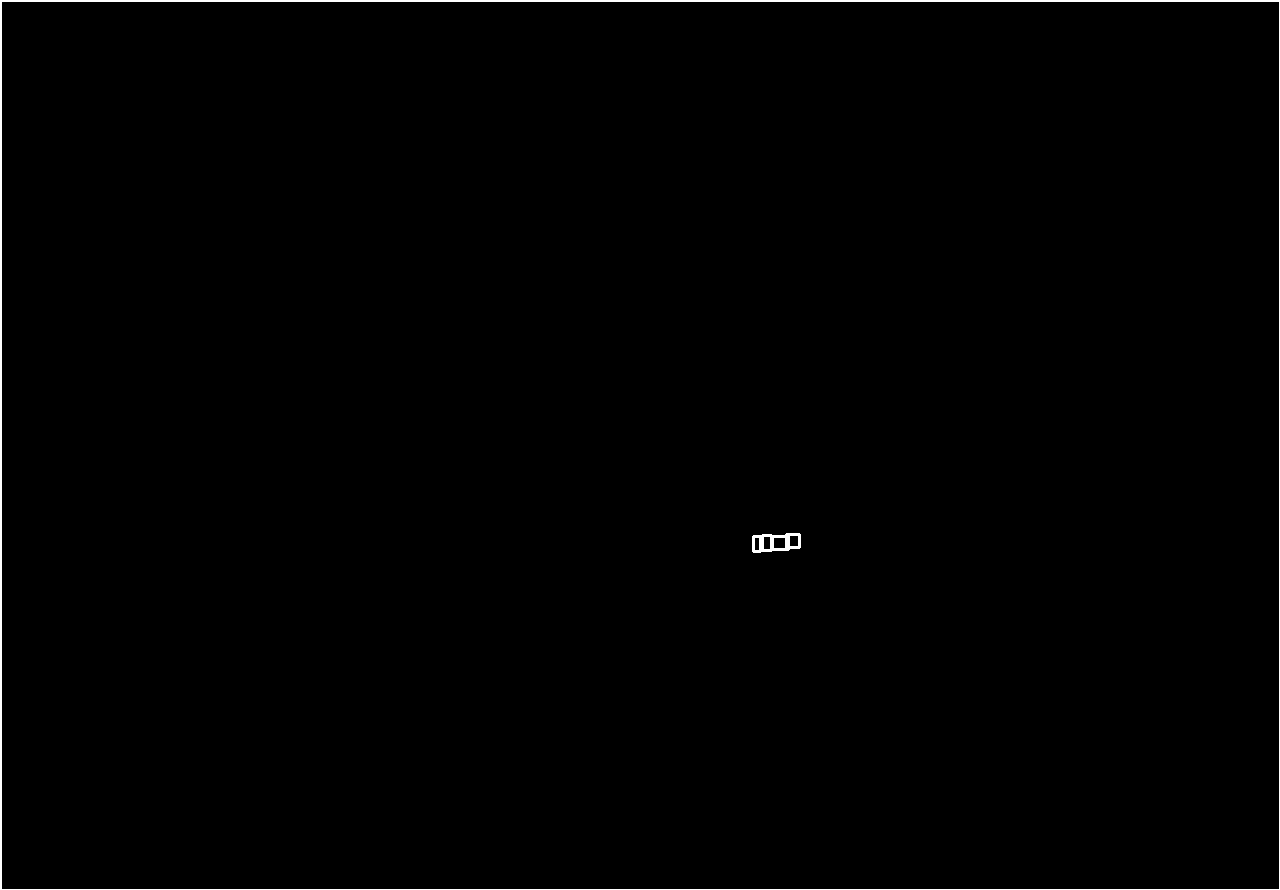

In [117]:
cv2_imshow(temp_result)

In [118]:
#어떤게 번호판처럼 생겼는지?

MIN_AREA = 80
MIN_WIDTH, MIN_HEIGHT = 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 1.0

possible_contours = []

cnt = 0
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    d['idx'] = cnt
    cnt += 1
    possible_contours.append(d)
    
# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
    cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)


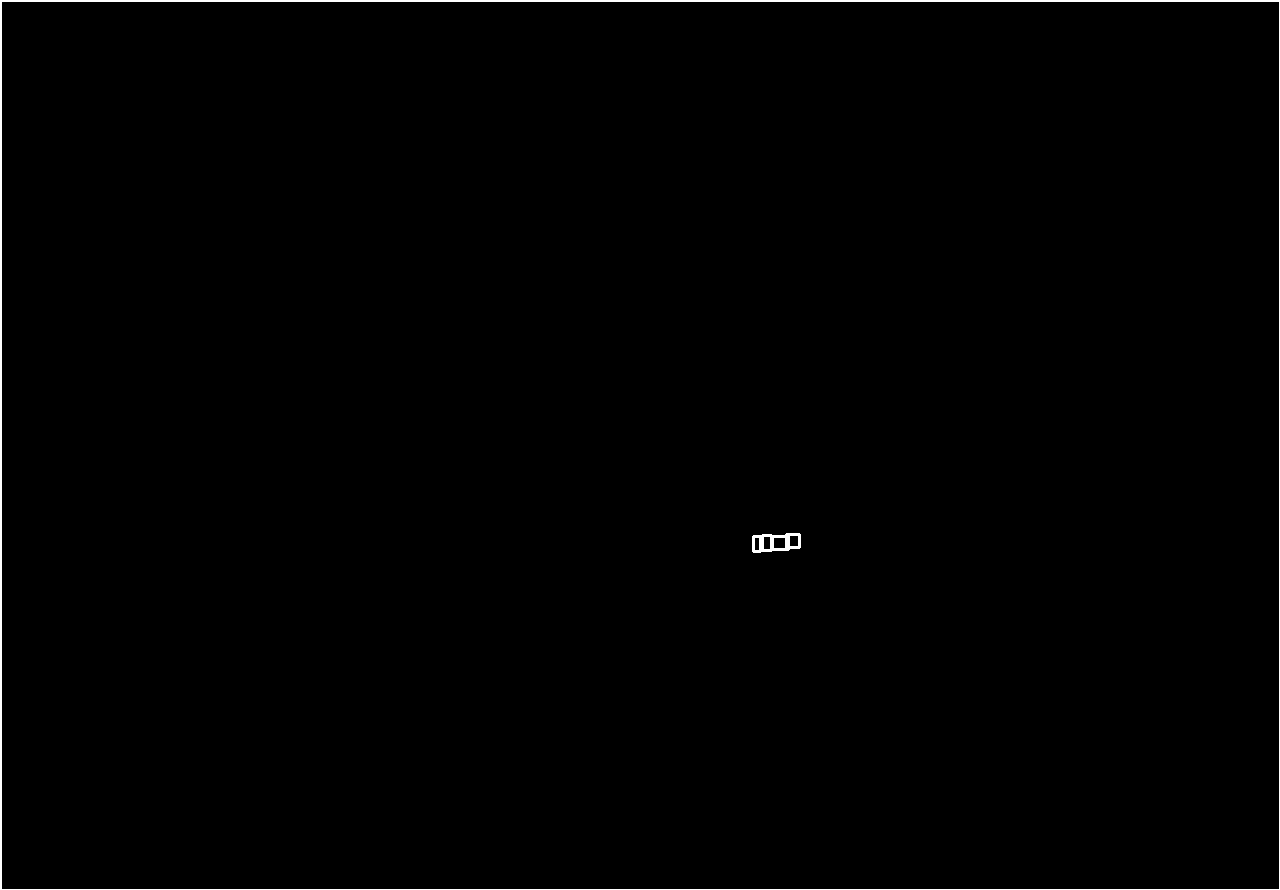

In [119]:
cv2_imshow(temp_result)

In [120]:
#리얼 번호판 추려내기
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])
        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

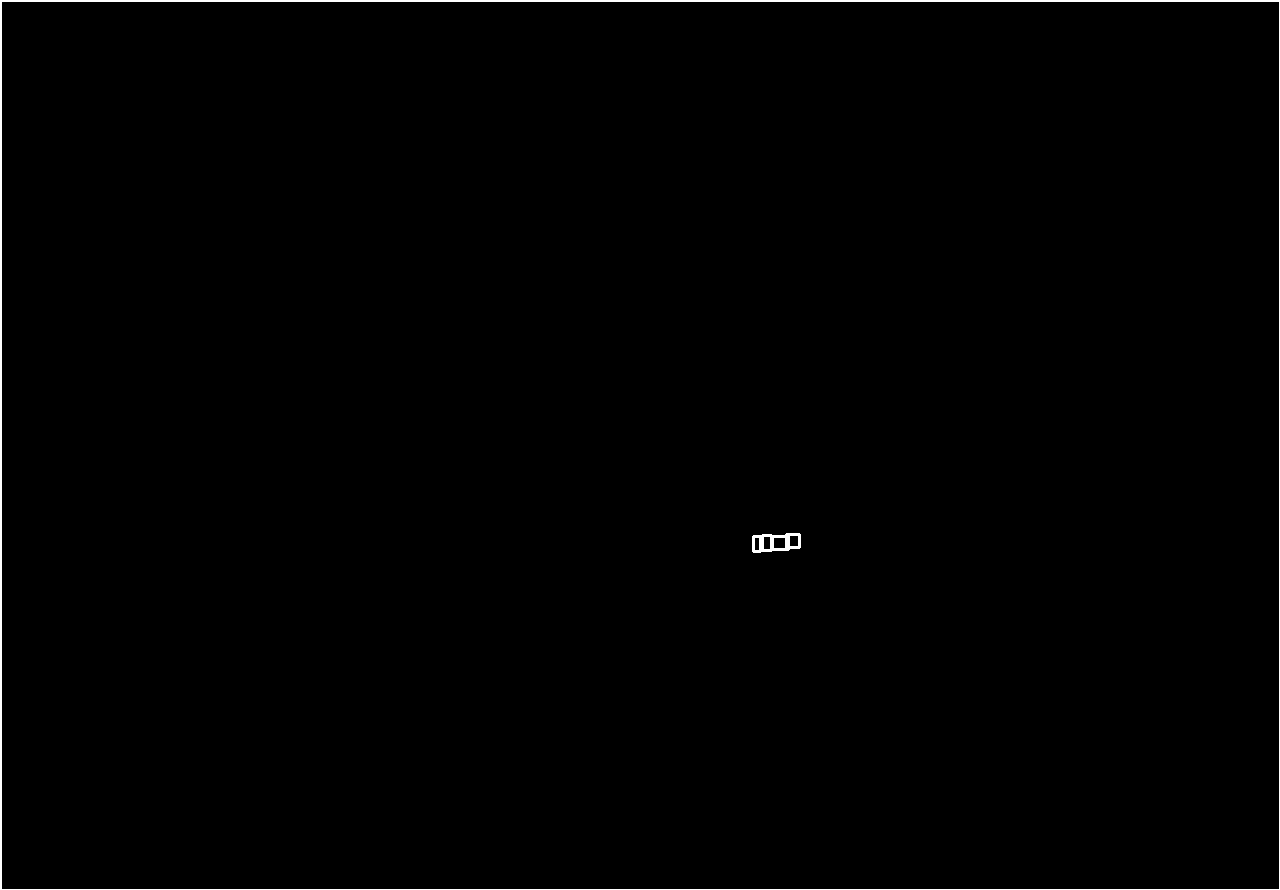

In [121]:
cv2_imshow(temp_result)

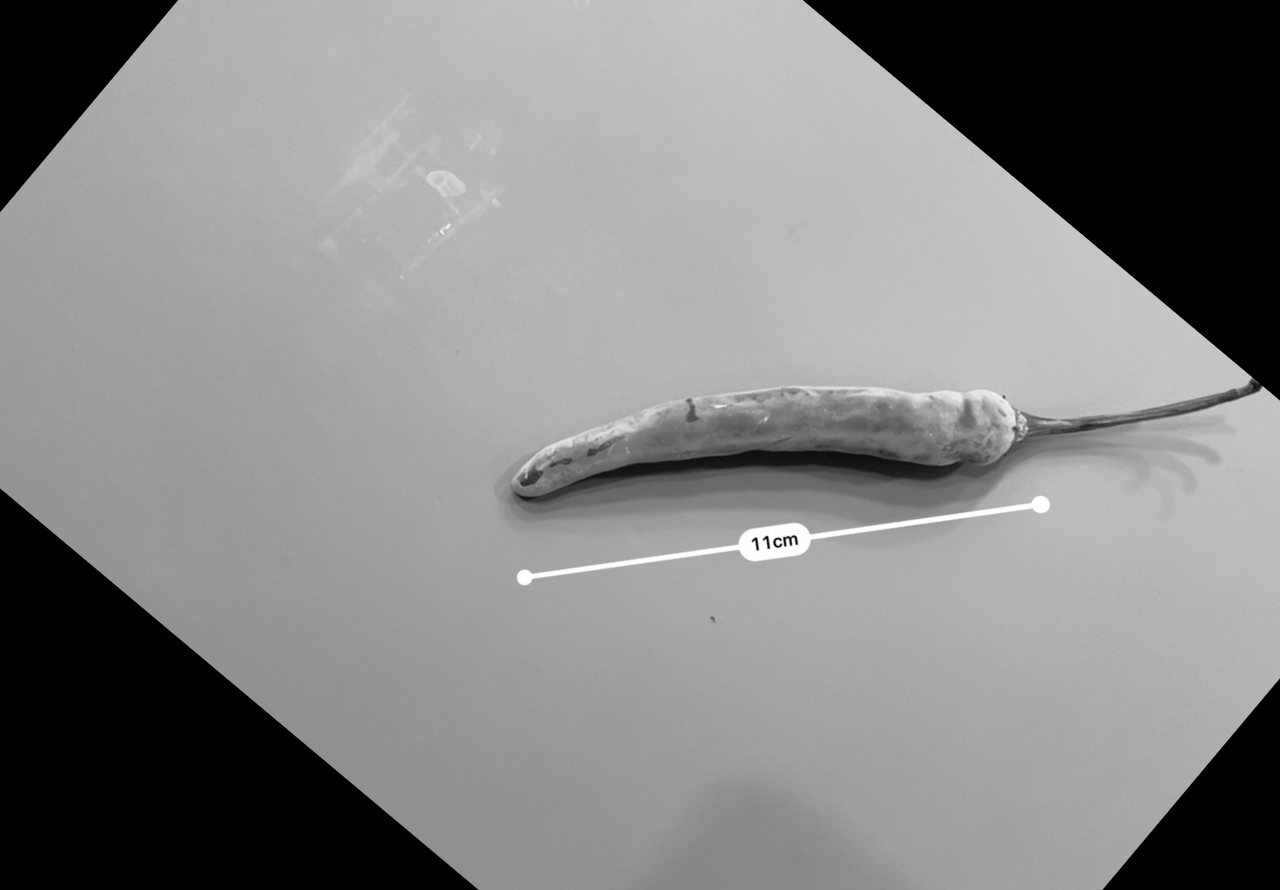

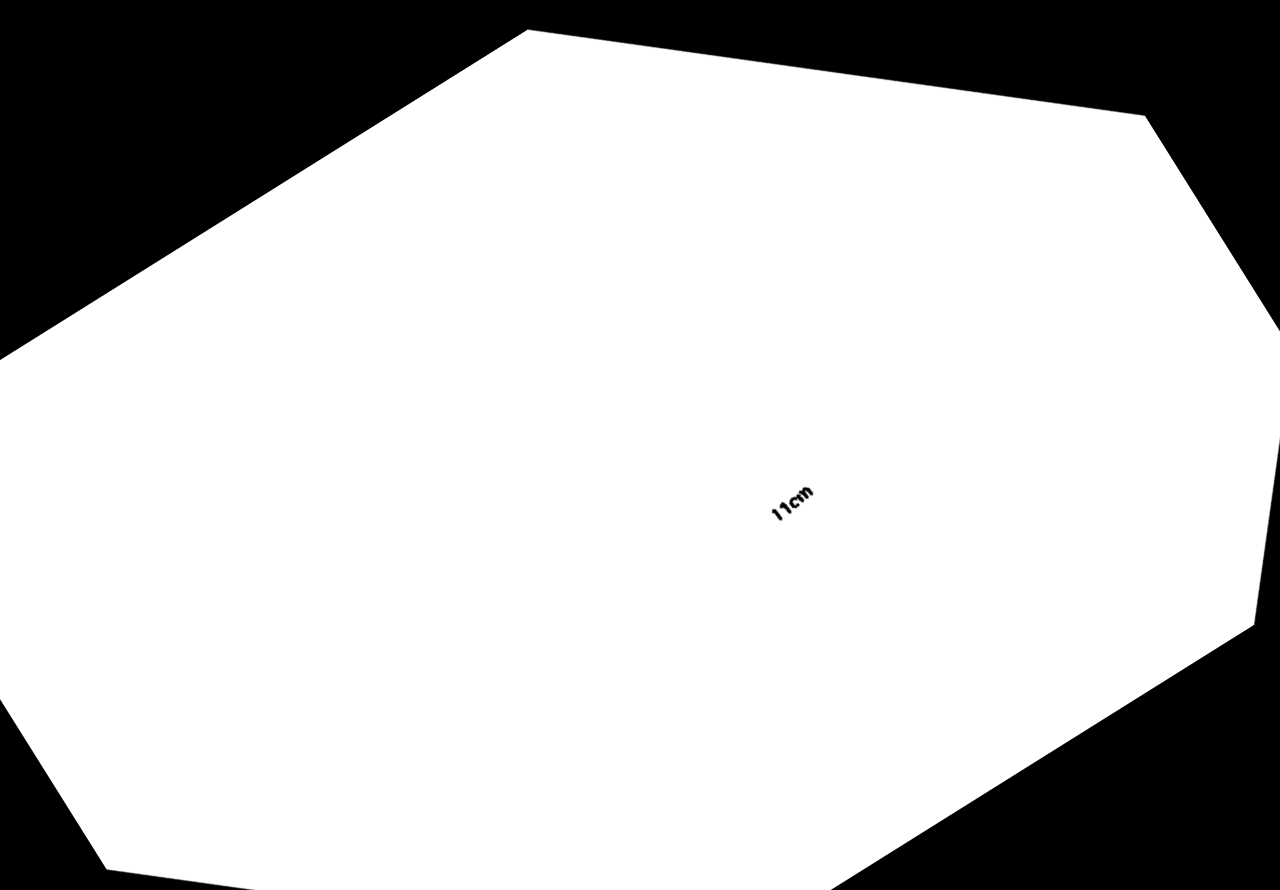

In [135]:
#똑바로 돌리기
PLATE_WIDTH_PADDING = 1.3 # 1.3
PLATE_HEIGHT_PADDING = 1.5 # 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x: x['cx'])

    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx']) / 2
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy']) / 2
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']

    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
        np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
        np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center=(plate_cx, plate_cy), angle=angle, scale=1.0)
    
    img_rotated = cv2.warpAffine(mask, M=rotation_matrix, dsize=(width, height))
    cv2_imshow(grayCp)
    cv2_imshow(img_rotated)
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy))
    )
    
    # if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
    #     continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({
        'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)
    })

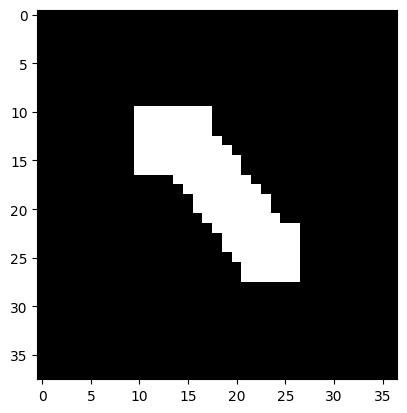

In [132]:
#최종확인
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

    chars = pytesseract.image_to_string(img_result, config='--psm 6')
    
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    print(result_chars)
    plate_chars.append(result_chars)

    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')
    plt.show()

In [133]:
chars

'a\n\x0c'